In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC

In [2]:
# Load the dataset
df = pd.read_csv('df_ape_price_woencoding.csv')

In [3]:
df.head()

,Unnamed: 0,ETH,score,rank,collection_size,metadata_Earring,metadata_Background,metadata_Fur,metadata_Clothes,metadata_Mouth,metadata_Eyes,metadata_Hat
0,2,80.0,1.013408,4074,10000,NaN,Aquamarine,Dmt,Navy Striped Tee,Bored,Eyepatch,Bayc Hat Red
1,3,120.0,0.906213,7740,10000,NaN,Yellow,Dark Brown,NaN,Bored Cigarette,Wide Eyed,Party Hat 2
2,5,93.0,0.823711,9540,10000,NaN,Orange,Brown,NaN,Bored Unshaven,Robot,Fez
3,6,38.5,0.863739,8867,10000,NaN,Orange,Dark Brown,Prison Jumpsuit,Bored Cigarette,Coins,NaN
4,7,80.0,1.025079,3747,10000,NaN,Gray,Cheetah,Tweed Suit,Small Grin,Eyepatch,NaN


In [6]:
columns_to_drop = [
     'collection_size', 'metadata_Earring' , 'Unnamed: 0'
]
df=df.drop(columns_to_drop, axis=1)
df = df.dropna()

In [7]:
ape_X = df.drop('ETH', axis=1)
ape_y = df['ETH']

In [8]:
# 3. Split the dataset into training (60%), validation (20%), and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(ape_X, ape_y, test_size=0.2, random_state=0)


print(X_train[:5], '\n\n', y_train[:5])

         score  rank metadata_Background metadata_Fur   metadata_Clothes  \
1365  1.053463  2986              Purple   Dark Brown  Sleeveless Logo T   
7     0.947356  6343              Orange        White     Smoking Jacket   
1697  1.073192  2534                Gray        Black       Bayc T Black   
586   1.202242   656              Yellow    Death Bot       Sailor Shirt   
833   0.898739  7970       New Punk Blue        Black          Guayabera   

                metadata_Mouth metadata_Eyes     metadata_Hat  
1365                Phoneme Oh            3d  Prussian Helmet  
7               Bored Unshaven         Coins       Cowboy Hat  
1697                Discomfort    Hypnotized           Safari  
586                      Bored           Sad       Cowboy Hat  
833   Bored Unshaven Cigarette     Bloodshot           Beanie   

 1365     0.55
7       55.00
1697     2.00
586      0.99
833     71.00
Name: ETH, dtype: float64


In [9]:
columns_to_encode = [
    'metadata_Background', 'metadata_Fur', 'metadata_Clothes', 
    'metadata_Mouth', 'metadata_Eyes', 'metadata_Hat'
]

# Perform one-hot encoding on the specified columns
encoded_X_train = pd.get_dummies(X_train, columns=columns_to_encode)
encoded_X_test = pd.get_dummies(X_test, columns=columns_to_encode)
# Find the columns in X_train_encoded that are not in X_test_encoded
unmatched_columns = [col for col in encoded_X_train.columns if col not in encoded_X_test.columns]

# Drop the unmatched columns from X_train_encoded
encoded_X_train = encoded_X_train.drop(unmatched_columns, axis=1)


In [10]:
# drop low variance columns, setting threshold = 0.02. 

from sklearn.feature_selection import VarianceThreshold
var_thr = VarianceThreshold(threshold = 0.02)
var_thr.fit(encoded_X_train)

# pick low variance columns
concol_train = [column for column in encoded_X_train.columns if column not in encoded_X_train.columns[var_thr.get_support()]]

# drop low variance columns
X_train_variance = encoded_X_train.drop(concol_train,axis=1)
X_train_variance

# print dropped columns
print(concol_train)
print(len(concol_train))

['score', 'metadata_Fur_Death Bot', 'metadata_Fur_Noise', 'metadata_Fur_Robot', 'metadata_Fur_Trippy', 'metadata_Clothes_Admirals Coat', 'metadata_Clothes_Bandolier', 'metadata_Clothes_Bayc T Red', 'metadata_Clothes_Biker Vest', 'metadata_Clothes_Black Holes T', 'metadata_Clothes_Black Suit', 'metadata_Clothes_Blue Dress', 'metadata_Clothes_Cowboy Shirt', 'metadata_Clothes_Guayabera', 'metadata_Clothes_Hip Hop', 'metadata_Clothes_Kings Robe', 'metadata_Clothes_Lumberjack Shirt', 'metadata_Clothes_Pimp Coat', 'metadata_Clothes_Prom Dress', 'metadata_Clothes_Rainbow Suspenders', 'metadata_Clothes_Space Suit', 'metadata_Clothes_Stunt Jacket', 'metadata_Clothes_Tie Dye', 'metadata_Mouth_Bored Bubblegum', 'metadata_Mouth_Bored Cigar', 'metadata_Mouth_Bored Party Horn', 'metadata_Mouth_Bored Pipe', 'metadata_Mouth_Bored Unshaven Bubblegum', 'metadata_Mouth_Bored Unshaven Cigar', 'metadata_Mouth_Bored Unshaven Pizza', 'metadata_Mouth_Grin Diamond Grill', 'metadata_Mouth_Grin Gold Grill', 'met

In [11]:
# drop low variance columns

concol_test = [column for column in encoded_X_test.columns if column not in X_train_variance.columns]
X_test_variance = encoded_X_test.drop(concol_test,axis=1)
X_test_variance

# print dropped columns
print(concol_test)

['score', 'metadata_Fur_Death Bot', 'metadata_Fur_Noise', 'metadata_Fur_Robot', 'metadata_Fur_Trippy', 'metadata_Clothes_Admirals Coat', 'metadata_Clothes_Bandolier', 'metadata_Clothes_Bayc T Red', 'metadata_Clothes_Biker Vest', 'metadata_Clothes_Black Holes T', 'metadata_Clothes_Black Suit', 'metadata_Clothes_Blue Dress', 'metadata_Clothes_Cowboy Shirt', 'metadata_Clothes_Guayabera', 'metadata_Clothes_Hip Hop', 'metadata_Clothes_Kings Robe', 'metadata_Clothes_Lumberjack Shirt', 'metadata_Clothes_Pimp Coat', 'metadata_Clothes_Prom Dress', 'metadata_Clothes_Rainbow Suspenders', 'metadata_Clothes_Space Suit', 'metadata_Clothes_Stunt Jacket', 'metadata_Clothes_Tie Dye', 'metadata_Mouth_Bored Bubblegum', 'metadata_Mouth_Bored Cigar', 'metadata_Mouth_Bored Party Horn', 'metadata_Mouth_Bored Pipe', 'metadata_Mouth_Bored Pizza', 'metadata_Mouth_Bored Unshaven Bubblegum', 'metadata_Mouth_Bored Unshaven Cigar', 'metadata_Mouth_Bored Unshaven Pizza', 'metadata_Mouth_Grin Diamond Grill', 'metadat

In [29]:
corr_matrix=X_train_variance.corr()
corr_matrix.mask(corr_matrix.abs() < 0.9)
plt.figure(figsize=(50, 50),dpi=144)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

KeyboardInterrupt: 

In [32]:
# n_components=40 as for now and can be changed
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
X_train_reduced = pca.fit_transform(X_train_variance)
X_train_reduced = pd.DataFrame(X_train_reduced)
explained_variance_train = pca.explained_variance_ratio_.sum()
print(explained_variance_train)

0.9999996401756901


In [33]:
X_test_reduced = pca.transform(X_test_variance)
X_test_reduced = pd.DataFrame(X_test_reduced)
explained_variance_test = pca.explained_variance_ratio_.sum()
print(explained_variance_test)

0.9999996401756901


In [34]:
#X_train_reduced, X_test_reduced, y_train, y_test
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the XGBoost regressor
regressor = xgb.XGBRegressor(objective='reg:squarederror')
regressor.fit(X_train_variance, y_train)

# Make predictions using the trained model
y_pred = regressor.predict(X_test_variance)
pred_train_xgb = regressor.predict(X_train_variance)
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
# Calculate the mean squared error
mse = mean_squared_error(y_train, pred_train_xgb)
print(f"Mean Squared Error: {mse}")
# Calculate the R-squared score
r2 = r2_score(y_train, pred_train_xgb)
print(f"R-squared: {r2}")

Mean Squared Error: 3806.4608635582226
R-squared: -0.20771760750835178
Mean Squared Error: 58.24322475098408
R-squared: 0.9809573516543545


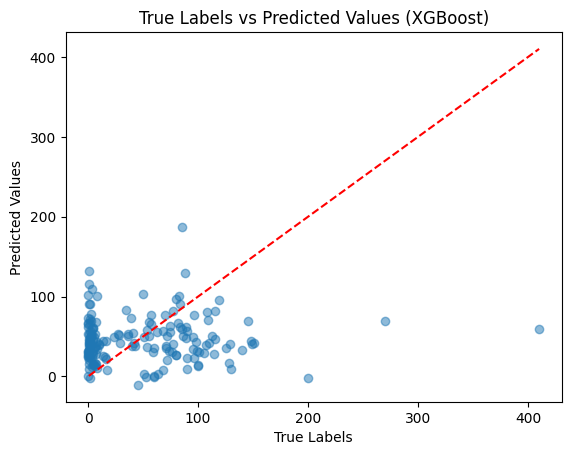

In [35]:
import matplotlib.pyplot as plt

# Create a scatter plot comparing the true labels and the predicted values from XGBoost
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Labels')
plt.ylabel('Predicted Values')
plt.title('True Labels vs Predicted Values (XGBoost)')

# Add a diagonal line representing a perfect prediction
max_value = max(max(y_test), max(y_pred))
plt.plot([0.7, max_value], [0.7, max_value], color='red', linestyle='--')

# Show the plot
plt.show()

In [36]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=500,random_state=42)
rf_regressor.fit(X_train_reduced, y_train)
# Make predictions using the trained model
y_pred_rf = rf_regressor.predict(X_test_reduced)
pred_train_rf = rf_regressor.predict(X_train_reduced)
# Calculate the mean squared error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error (Random Forest): {mse_rf}")
# Calculate the R-squared score
r2_rf = r2_score(y_test, y_pred_rf)
print(f"R-squared (Random Forest): {r2_rf}")
mse_rf_train = mean_squared_error(y_train, pred_train_rf)
print(f"Mean Squared Error (Random Forest): {mse_rf_train}")
# Calculate the R-squared score
r2_rf_train = r2_score(y_train, pred_train_rf)
print(f"R-squared (Random Forest): {r2_rf_train}")

Mean Squared Error (Random Forest): 3393.6726080898584
R-squared (Random Forest): -0.07674774805844287
Mean Squared Error (Random Forest): 450.03521279152005
R-squared (Random Forest): 0.8528607861775053


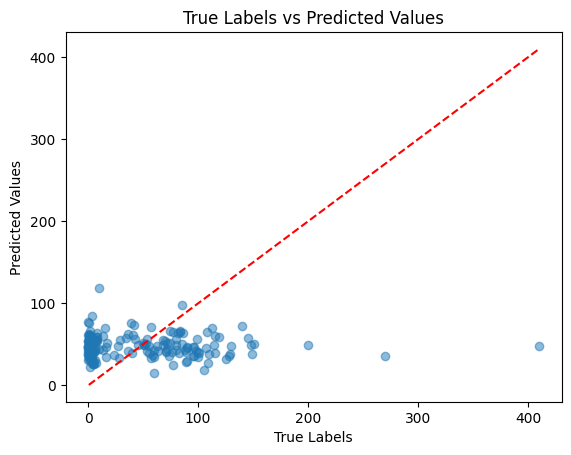

In [37]:
import matplotlib.pyplot as plt

# Create a scatter plot comparing the true labels and the predicted values
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('True Labels')
plt.ylabel('Predicted Values')
plt.title('True Labels vs Predicted Values')

# Add a diagonal line representing a perfect prediction
max_value = max(max(y_test), max(y_pred_rf))
plt.plot([0.7, max_value], [0.7, max_value], color='red', linestyle='--')

# Show the plot
plt.show()

In [38]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train_reduced, y_train)
y_pred_lr = lr_model.predict(X_test_reduced)
pred_train = lr_model.predict(X_train_reduced)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Mean Squared Error (Linear Regression): {mse_lr}")


r2_lr = r2_score(y_test, y_pred_lr)
print(f"R-squared (Linear Regression): {r2_lr}")
from sklearn.metrics import mean_squared_error, r2_score
mse_lr_train = mean_squared_error(y_train, pred_train)
print(f"Mean Squared Error on Training Set (Linear Regression): {mse_lr_train}")
r2_lr_train = r2_score(y_train, pred_train)
print(f"R-squared on Training Set (Linear Regression): {r2_lr_train}")


Mean Squared Error (Linear Regression): 3260.7229360578763
R-squared (Linear Regression): -0.034565346720053514
Mean Squared Error on Training Set (Linear Regression): 2940.3025969783707
R-squared on Training Set (Linear Regression): 0.038666752683515826


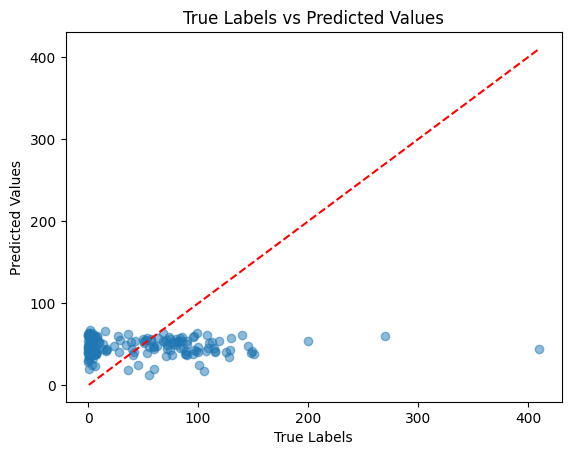

In [39]:
import matplotlib.pyplot as plt

# Create a scatter plot comparing the true labels and the predicted values
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel('True Labels')
plt.ylabel('Predicted Values')
plt.title('True Labels vs Predicted Values')

# Add a diagonal line representing a perfect prediction
max_value = max(max(y_test), max(y_pred_lr))
plt.plot([0.7, max_value], [0.7, max_value], color='red', linestyle='--')

# Show the plot
plt.show()